In [ ]:
# to deactivate warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Step 2: Create a Sample Dataset

In [2]:
# Create a DataFrame with daily sales data
data = {
    "Date": pd.date_range(start="2023-01-01", end="2023-03-31", freq="D"),
    "Sales": [200 + (x // 7) * 50 + (-1)**x * 10 for x in range(90)]  # Simulated sales pattern
}

df = pd.DataFrame(data)

# Set the 'Date' column as the index
df.set_index("Date", inplace=True)
print(df.head())

            Sales
Date             
2023-01-01    210
2023-01-02    190
2023-01-03    210
2023-01-04    190
2023-01-05    210


#Step 3: Visualize the Data

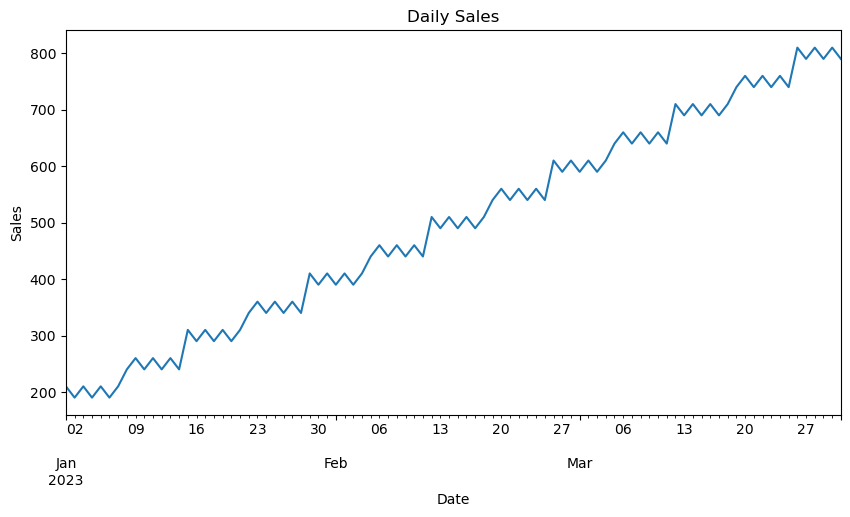

In [5]:
# Plot the sales data
df["Sales"].plot(title="Daily Sales", figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

#Step 4: Resample the Data
Resample the data to aggregate sales by week and month.

C:\Users\ajayc\AppData\Local\Temp\ipykernel_6256\1560174162.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M").sum()


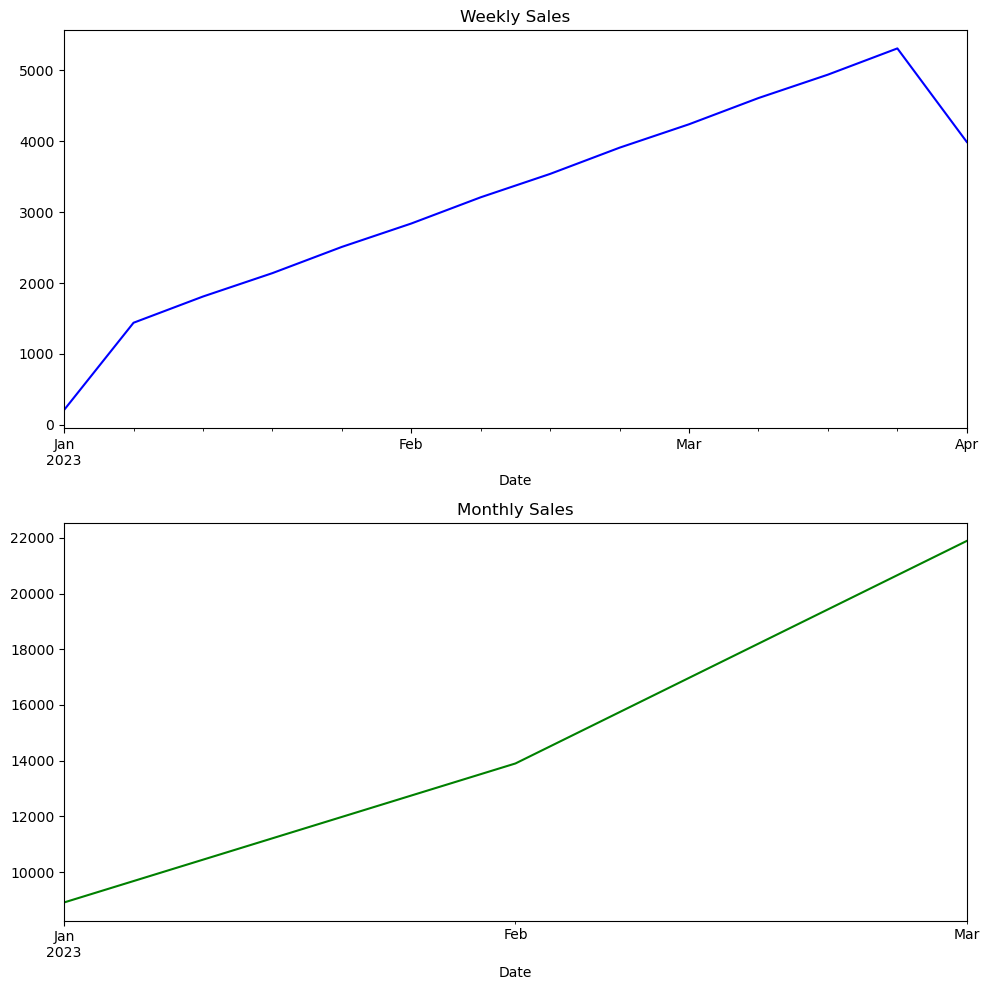

In [7]:
# Weekly sales
weekly_sales = df.resample("W").sum()

# Monthly sales
monthly_sales = df.resample("M").sum()

# Plot weekly and monthly sales
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
weekly_sales["Sales"].plot(ax=ax[0], title="Weekly Sales", color="blue")
monthly_sales["Sales"].plot(ax=ax[1], title="Monthly Sales", color="green")
plt.tight_layout()
plt.show()


#Step 5: Rolling Statistics
Calculate a 7-day moving average to smooth short-term fluctuations.

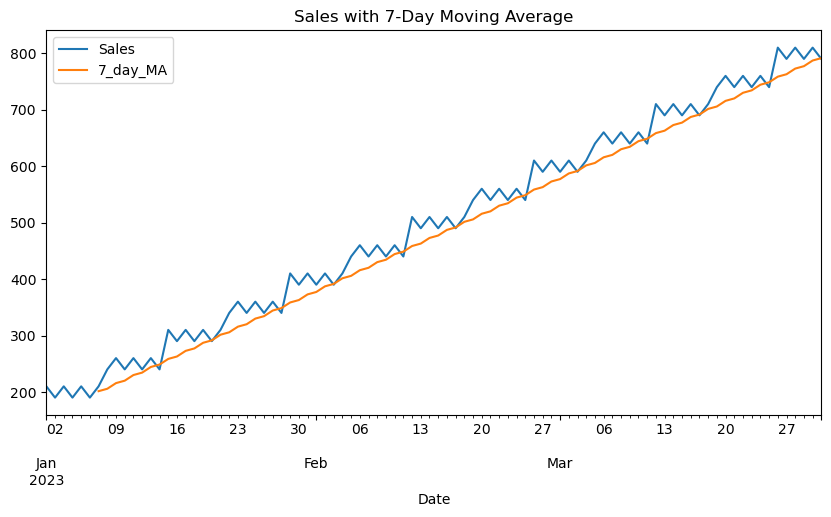

In [9]:
# Add 7-day moving average
df["7_day_MA"] = df["Sales"].rolling(window=7).mean()

# Plot original sales and moving average
df[["Sales", "7_day_MA"]].plot(title="Sales with 7-Day Moving Average", figsize=(10, 5))
plt.show()


#Step 6: Time Series Decomposition
Decompose the time series into trend, seasonal, and residual components.

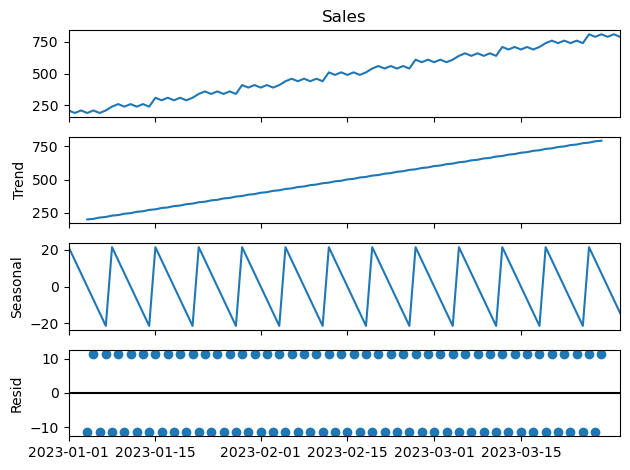

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series (assuming daily frequency)
decompose_result = seasonal_decompose(df["Sales"], model="additive", period=7)

# Plot the decomposition
decompose_result.plot()
plt.show()


#Step 7: Forecasting with ARIMA
For simplicity, forecast the next 7 days using an ARIMA model.

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(df["Sales"], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)
print("Forecasted Sales for the Next 7 Days:")
print(forecast)


C:\Users\ajayc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ajayc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ajayc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecasted Sales for the Next 7 Days:
2023-04-01    809.809109
2023-04-02    790.000007
2023-04-03    809.809103
2023-04-04    790.000013
2023-04-05    809.809096
2023-04-06    790.000020
2023-04-07    809.809090
Freq: D, Name: predicted_mean, dtype: float64


key Insights:
1.Weekly and monthly resampling helps identify overall trends.
2.Moving averages highlight patterns and remove short-term noise.
3.Decomposition reveals underlying components like trend and seasonality.
4.ARIMA provides a simple forecasting tool for short-term predictions.